# Example notebook showing how to use the Movie class

In [1]:
from mpl_moviemaker import Movie
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [12]:
def plot_sin(fig, ax, frame_number, linewidth=4):
    '''
    a simple function to plot the sine function, where theta is frame_number*pi/180
    '''
    theta = (frame_number)*np.pi/180
    x = np.arange(theta-360*np.pi/180, theta+180*np.pi/180, 0.01)
    ax.plot(x, np.sin(x), color='MediumSeaGreen', linewidth=linewidth)
    ax.axvline(theta, color='white', alpha=0.5)
    
    ax.plot(
        theta,
        np.sin(theta),
        color='white',
        marker='o',
    )
    
    ax.set_xlim(theta-180*np.pi/180, theta+180*np.pi/180)
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel('$sin(\Theta)$')
    ax.set_title('sine({:0.0f}) = {:0.2f}'.format(theta, np.sin(theta)),rotation=0, ha='center', va='top')

In [9]:
def build_figure_and_axis():
    fig, ax = plt.subplots(figsize=(10,5))
    
    return fig, ax

In [13]:
movie = Movie(
    start_frame=0,
    end_frame=360,
    fps=60,
    frame_interval=1,
    output_filename='sample_movie_1.gif',
    fig_ax_func=build_figure_and_axis,
    frame_func=plot_sin
)

361it [00:32, 11.25it/s]                                                                                                                                                                                                                                      


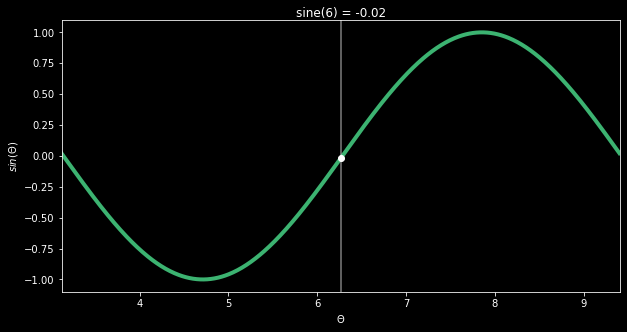

In [14]:
movie.make_movie()

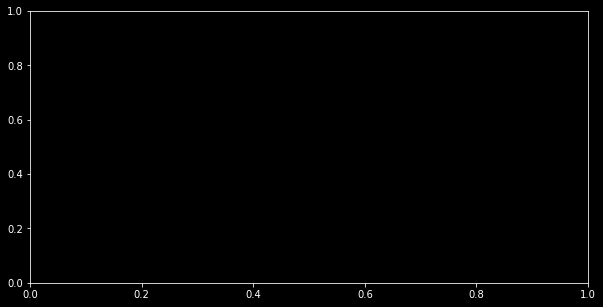

In [17]:
fig, ax = build_figure_and_axis()

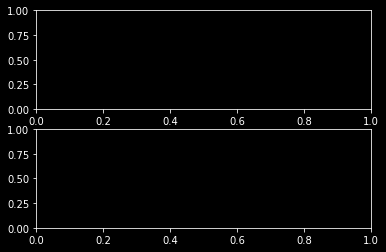

In [33]:
fig, ax = plt.subplots(2,1)
def clear_axis(ax):
    try:
        ax.cla()
    except AttributeError:
        if isinstance(ax, np.ndarray):
            for subaxis in ax.flatten():
                subaxis.cla()
        elif isinstance(self.ax, dict):
            for key in self.ax.keys():
                self.ax[key].cla()

In [34]:
clear_axis(ax)

In [23]:
impomatplotlib.axes._subplots import AxesSubplot

ImportError: cannot import name 'AxesSubplot' from 'matplotlib.axes._subplots' (/home/dollerenshaw/.conda/envs/neurotransmitter_imaging/lib/python3.9/site-packages/matplotlib/axes/_subplots.py)

In [24]:
import matplotlib as mpl

In [27]:
dir(mpl.axes._subplots)

['Axes',
 'GridSpec',
 'Subplot',
 'SubplotBase',
 'SubplotSpec',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_picklable_subplot_class_constructor',
 '_subplot_classes',
 'docstring',
 'functools',
 'martist',
 'subplot_class_factory']